In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
the_path = os.getcwd()
data_path = the_path + '/data/'
file_name  = 'bitcoin_all.csv'
file_path = data_path + file_name
df_data    = pd.read_csv(file_path) # load csv file

In [3]:
df_data.head(5) # peak on the dataset

,Coin,Date,Open*,High,Low,Close**,Volume,Market Cap
0,bitcoin,"Jul 02, 2018",6380.38,6683.86,6305.70,6614.18,"4,396,930,000","109,273,000,000"
1,bitcoin,"Jul 01, 2018",6411.68,6432.85,6289.29,6385.82,"4,788,260,000","109,797,000,000"
2,bitcoin,"Jun 30, 2018",6214.22,6465.51,6214.22,6404.00,"4,543,860,000","106,405,000,000"
3,bitcoin,"Jun 29, 2018",5898.13,6261.66,5835.75,6218.30,"3,966,230,000","100,981,000,000"
4,bitcoin,"Jun 28, 2018",6153.16,6170.41,5873.05,5903.44,"3,467,800,000","105,336,000,000"


In [4]:
df_data['Average'] = (df_data['Open*']+df_data['Close**'])/2
df_data['Date'] = pd.to_datetime(df_data['Date'])

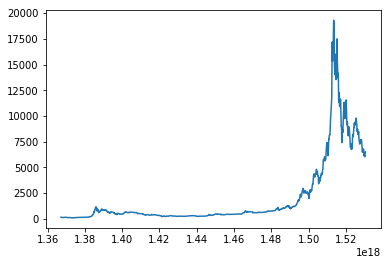

In [5]:
plt.plot(df_data['Date'], df_data['Average'])
plt.show()

In [10]:
new_df = df_data[['Date', 'Average']].copy()
new_df.rename(columns={'Date': 'ds', 'Average': 'y'}, inplace=True)
new_df.head(5)

,ds,y
0,2018-07-02,6497.280
1,2018-07-01,6398.750
2,2018-06-30,6309.110
3,2018-06-29,6058.215
4,2018-06-28,6028.300


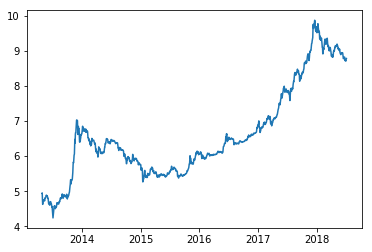

In [11]:
new_df['y'] = np.log(new_df['y'])
plt.plot(new_df['ds'], new_df['y'])
plt.show()

In [12]:
m = Prophet()
m.fit(new_df)
future = m.make_future_dataframe(periods=365)
future.tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
2251,2019-06-28
2252,2019-06-29
2253,2019-06-30
2254,2019-07-01
2255,2019-07-02


In [13]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2251,2019-06-28,10.134731,6.326401,13.665139
2252,2019-06-29,10.137734,6.295466,13.716268
2253,2019-06-30,10.141740,6.300911,13.711415
2254,2019-07-01,10.149188,6.289850,13.775883
2255,2019-07-02,10.158421,6.223208,13.823345


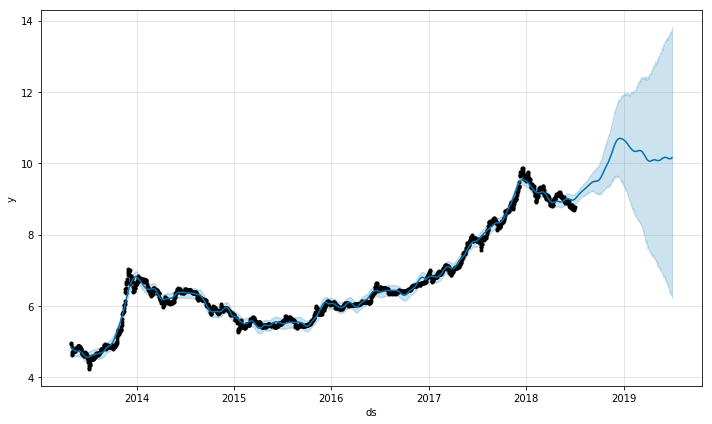

In [14]:
m.plot(forecast)

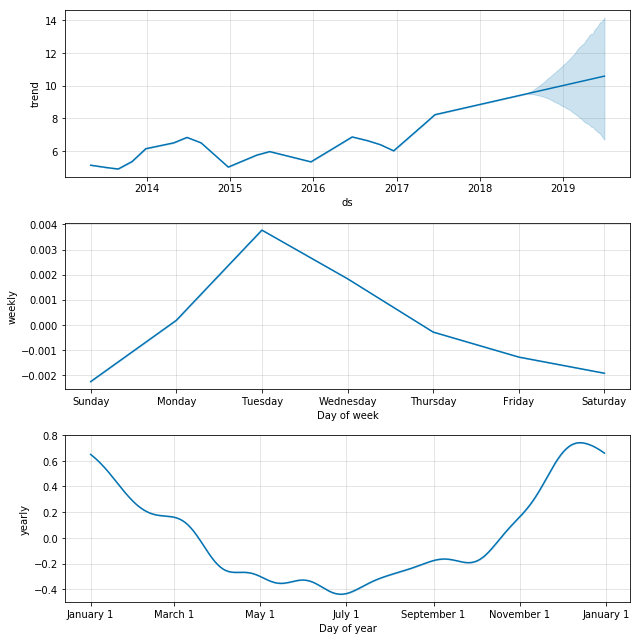

In [16]:
m.plot_components(forecast)